# Занятие 11
# Алгебра
### Плоские многоугольники в пространстве. Проекция многоугольника на плоскость.

In [1]:
import sympy as sp
#Для красивой печати:
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
#from IPython.display import display #подключить, если не работает display

### Плоский многоугольник в пространстве. Проекция точки на плоскость.
#### Пример 1.
Пусть задан треугольник ABC в пространстве (имеется в виду множество всех граничных и внутренних точек треугольника, ограниченного отрезками AB, BC и AC), т.е. заданы точки A,B и C. Предположим, что на этот непрозрачный треугольник светит бесконечно удаленный источник света, так что лучи падают перпендикулярно плоскости треугольника ABC. 
Построим тень, отбрасываемую треугольником на горизонтальную плоскость. Эта тень - проекция треугольника ABC на горизонтальную плоскость.

In [2]:
A=sp.Point(2,3,5)
B=sp.Point(4,7,6)
C=sp.Point(5,1,2)
O=sp.Point(0,0,0)
normal_z=(0, 0, 1)
TriangleABC=[A,B,C]
PlaneABC=sp.Plane(*TriangleABC)
display(PlaneABC)
XY = sp.Plane(O, normal_vector=normal_z)
TriangleABC_projection=[XY.projection(P) for P in TriangleABC]
TriangleABC_projection

## Plane_name.projection(Point_name) 
строит проекцию точки Point_name на плоскость Plane_name в направлении нормального вектора плоскости Plane_name.

Найдем проекции вершин треугольника TriangleABC_projection на плоскость ABC:

In [3]:
TriangleABC_projection_projectionABC=[PlaneABC.projection(P) for P in TriangleABC_projection]
TriangleABC_projection_projectionABC

Заметим, что это не точки A, B и C.

Построим плоскость Plane1, параллельную ABC, построим проекцию A, B и C на Plane1 и обратно:

In [4]:
Plane1=PlaneABC.parallel_plane(O)
TriangleABC_projection1=[Plane1.projection(P) for P in TriangleABC]
TriangleABC_projection1_projection_back=[PlaneABC.projection(P) for P in TriangleABC_projection1]
display(TriangleABC)
display(TriangleABC_projection1)
display(TriangleABC_projection1_projection_back)

### Проекция прямой на плоскость.
#### Пример 2.
Пусть задана прямая AB в пространстве, построим проекции ABxy, AByz, ABxz этой прямой на координатные плоскости, а также проекцию AB1 на плоскость, перпендикулярную   AB, проходящую через начало координат.

AB.direction - направляющий вектор прямой AB, это объект типа Point3D, но его можно использовать как вектор нормали при построении перпендикулярной плоскости для данной прямой.

In [6]:
AB = sp.Line(A, B)
normal_yz = (1, 0, 0)
normal_xz = (0, 1, 0)
AB_perp_plane = sp.Plane(O, AB.direction)
AB_perp_plane.is_perpendicular(
    AB)  # проверяем, что действительно перпендикулярная плоскость
YZ = sp.Plane(O, normal_yz)
XZ = sp.Plane(O, normal_xz)
ABxy = XY.projection_line(AB)
display(ABxy)
AByz = YZ.projection_line(AB)
display(AByz)
ABxz = XZ.projection_line(AB)
display(ABxz)
AB1 = AB_perp_plane.projection_line(AB)
display(AB1)  #projection_line(line)

### Тень в случае точечного источника света
#### Пример 3.
Пусть на треугольник ABC в пространстве светит точечный источник света, расположенный в точке L. Построим тень, отбрасываемую треугольником на горизонтальную плоскость. Эта тень - треугольник с вершинами в точках пересечения лучей LA,LB, LC с горизонтальной плоскостью.

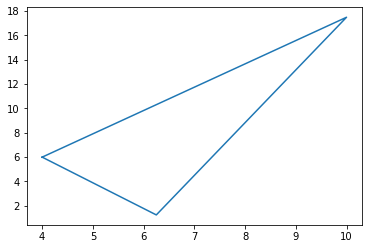

In [7]:
L=sp.Point(0,0,10)
Rays=[sp.Ray(L,P) for P in TriangleABC]
Points_XY=[item.intersection(XY)[0] for item in Rays]
Points_XY
plt.plot([P.x for P in (Points_XY+[Points_XY[0]])],[P.y for P in (Points_XY+[Points_XY[0]])])

#### Пример 3.
Пусть на треугольник ABC в пространстве светит точечный источник света, расположенный в точке M. Построим тень, отбрасываемую треугольником на пол, если пол и стены расположены в первых четвертях координатных плоскостей (угол между стенами  - координатная ось ОZ, между стенами и полом - координатные оси OX и OY. Пол и стены имеют общую точку- начало координат).

Используем пример 2.

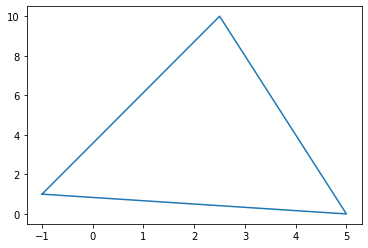

In [8]:
M=sp.Point(5,5,10)
RaysM=[sp.Ray(M,P) for P in TriangleABC]
Points_XY=[item.intersection(XY)[0] for item in RaysM]
plt.plot([P.x for P in (Points_XY+[Points_XY[0]])],[P.y for P in (Points_XY+[Points_XY[0]])])

Теперь нужно отсечь лишнюю часть, находящуюся вне первой координатной четверти,
используем cut_section для многоугольников на плоскости.

Вначале построим плоский треугольник АВСxy.

In [9]:
Points_XY=[sp.Point(P.x,P.y) for P in Points_XY]
Points_XY
ABCxy=sp.Polygon(*Points_XY)
ABCxy

Найдем вершину Pos треугольника, лежащую в первой четверти, ее координаты неотрицательны

In [10]:
Pos=[]
for P in Points_XY:
    if P.x>=0 and P.y>=0:
        Pos=P
        break# как только нашли нужную точку, выходим из цикла
Pos       

Построим оси X и Y и отсечем лишние части треугольника

In [11]:
OX=sp.Line(sp.Point(0,0),sp.Point(1,0))
OY=sp.Line(sp.Point(0,0),sp.Point(0,1))
ABCxy1,ABCxy2=ABCxy.cut_section(OX)
display(ABCxy1)
display(ABCxy2)
ABCsection=ABCxy1

ABCxy3,ABCxy4=ABCsection.cut_section(OY)
display(ABCxy3)
display(ABCxy4)
if ABCxy3.vertices[0].y>=0:
    ABCsection=ABCxy3
elif ABCxy4.vertices[0].y>=0:
    ABCsection=ABCxy4
else:
    print('error')    
ABCsection    

None

Изобразим на рисунке:

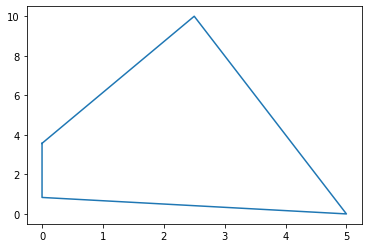

In [12]:
Points_to_plot=ABCsection.vertices+[ABCsection.vertices[0]]
X=[P.x for P in Points_to_plot]
Y=[P.y for P in Points_to_plot]
plt.plot(X,Y)#,ABCxy2,ABCxy,ABCsection )